In [ ]:
 from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#from google.colab import drive
#drive.mount('/content/ColabNotebooks')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = pd.read_csv('/content/gdrive/MyDrive/DS PROJECT/final folder/DATA/INTERNAL DATA/Data Preparation/X_DTF.csv')
Y = pd.read_csv('/content/gdrive/MyDrive/DS PROJECT/final folder/DATA/INTERNAL DATA/Data Preparation/Y_DTF.csv')

In [ ]:
X=X.drop(columns=['Unnamed: 0'], axis=1)
Y=Y.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,0.770270,0.079666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.733588e-02,5.366231e-02,4.032057e-02,3.932195e-02,2.594973e-02,2.701023e-02,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,0.0,1.0,0.0
1,0.770270,0.080937,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.733588e-02,5.366231e-02,4.032057e-02,3.932195e-02,2.594973e-02,2.701023e-02,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,1.0,0.0,0.0
2,0.770270,0.080937,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.733588e-02,5.366231e-02,4.032057e-02,3.932195e-02,2.594973e-02,2.701023e-02,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,1.0,0.0,0.0
3,0.770270,0.080937,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.733588e-02,5.366231e-02,4.032057e-02,3.932195e-02,2.594973e-02,2.701023e-02,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,1.0,0.0,0.0
4,0.770270,0.080937,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.733588e-02,5.366231e-02,4.032057e-02,3.932195e-02,2.594973e-02,2.701023e-02,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.500000,0.355263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.309733e-08,1.180560e-07,3.025871e-08,1.193569e-07,3.049800e-08,1.176119e-07,0.169656,0.269806,0.16145,0.205622,0.135821,0.145048,0.14758,0.062679,0.052357,0.032158,0.055132,0.083053,0.050334,0.071282,0.047996,0.047721,0.122117,0.063623,0.130022,0.094257,0.059684,0.039493,0.076512,0.061235,0.112455,0.041345,0.055377,0.078716,1.0,0.0,0.0,0.0,1.0,0.0
1644,0.621622,0.166058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.274015e-09,1.010828e-10,2.408357e-11,2.424514

In [ ]:
Y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
1643,0
1644,0
1645,0
1646,0


## LDA


In [ ]:

Y_train

,Target
1396,0
27,1
1327,1
654,1
289,1
...,...
763,1
835,1
1216,1
559,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

Y_pred_lda = lda.predict(X_test)
Y_pred_lda_prob = lda.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 38  14]
 [ 22 256]]
Accuracy0.8909090909090909


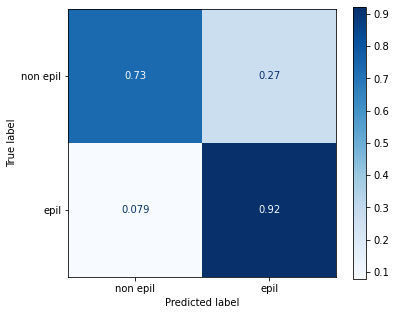

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix 

cm = confusion_matrix(Y_test, Y_pred_lda)
print(cm)
print('Accuracy' + str(accuracy_score(Y_test, Y_pred_lda)))


fig, ax= plt.subplots(figsize=(6,5))
plot_confusion_matrix(lda, X_test, Y_test, display_labels=["non epil", "epil"], cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.show()

In [ ]:
! pip install pycaret

     |████████████████████████████████| 266kB 5.1MB/s 
     |████████████████████████████████| 1.7MB 9.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 174kB 24.4MB/s 
     |████████████████████████████████| 1.4MB 19.8MB/s 
     |████████████████████████████████| 256kB 39.2MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 6.8MB 43.9MB/s 
     |████████████████████████████████| 14.2MB 257kB/s 
     |████████████████████████████████| 112kB 53.9MB/s 
     |████████████████████████████████| 276kB 53.9MB/s 
     |████████████████████████████████| 2.0MB 26.3MB/s 
     |████████████████████████████████| 1.2MB 34.8MB/s 
     |████████████████████████████████| 10.1MB 44.2MB/s 
     |████████████████████████████████| 645kB 32.0MB

**Blending**
 It uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the estimator_list parameter. 

In [ ]:
# blend individual models
lda_blend_soft = blend_models(estimator_list = [dt, lda], method = 'soft')

In [ ]:
plot_model(lda, plot='calibration')

In [ ]:
plot_model(tuned_lda, plot='feature')

In [ ]:
predict_model(lda_blend_soft);

In [ ]:
prediction = predict_model(lda_blend_soft, data=test_set)
prediction.head(6)

# SVM

****************************************

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [ ]:
def confusion_matrix_plot (X_train, y_train, X_test, y_test, classifier, y_pred , classifier_name):
  fig, ax= plt.subplots(figsize=(6,5))
  plot_confusion_matrix(classifier, X_test, y_test, display_labels=["NO epileptic", "epileptic"], cmap=plt.cm.Blues, normalize='true', ax=ax)
  ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
  plt.show()

  print(f'Accuracy Score Test y_test, y_pred: {accuracy_score(y_test,y_pred)}')
  print(f'Accuracy Score Train x_train, y_train: {classifier.score(X_train, y_train)} (comme comparison)')
  return print("")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.52      0.77      0.62        52
           1       0.95      0.87      0.91       278

    accuracy                           0.85       330
   macro avg       0.74      0.82      0.76       330
weighted avg       0.88      0.85      0.86       330



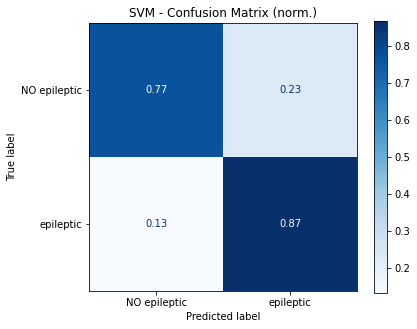

Accuracy Score Test y_test, y_pred: 0.8515151515151516
Accuracy Score Train x_train, y_train: 0.8512898330804249 (comme comparison)



In [ ]:
from sklearn.svm import  SVC

#instanciate and train the svm model on the training set.
support_vector_m = SVC(C=100,
                                     kernel='sigmoid',
                                     class_weight = 'balanced', 
                                     random_state=0)
support_vector_m.fit(X_train, y_train)#X_train_sc"
#make predictions (classes and probabilities) withe the trained model on the test set
y_pred_svm = support_vector_m.predict(X_test)#X_test_sc
#y_pred_svm_prob = support_vector_m.predict_proba(X_test)

print(classification_report(y_test,y_pred_svm))

#plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm,'SVM')
#roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
#precision_recall_curve_and_scores(X_test, y_test,y_pred_svm, y_pred_svm_prob, 'SVM')


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[ 40  12]
 [ 37 241]]
              precision    recall  f1-score   support

           0       0.52      0.77      0.62        52
           1       0.95      0.87      0.91       278

    accuracy                           0.85       330
   macro avg       0.74      0.82      0.76       330
weighted avg       0.88      0.85      0.86       330



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 ,cv=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.2s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.2s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=1, gamma=0.1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.01, kernel=poly ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.01, kernel=poly ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.01, kernel=poly ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.001, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.001, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.4s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=1, kernel=sigmoid ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=1, kernel=sigmoid ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.01, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.01, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.001, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.001, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.001, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.4s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.4s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.4s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.1s
[CV] C=100, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=100, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.2s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.01, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.3s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.2s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   38.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.62      0.73        52
           1       0.93      0.99      0.96       278

    accuracy                           0.93       330
   macro avg       0.91      0.80      0.84       330
weighted avg       0.93      0.93      0.92       330



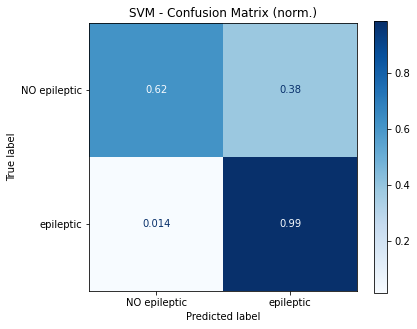

Accuracy Score Test y_test, y_pred: 0.9272727272727272
Accuracy Score Train x_train, y_train: 0.93247344461305 (comme comparison)



In [ ]:
#instanciate and train the svm model on the training set.
support_vector_m2 = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
support_vector_m2.fit(X_train, y_train)#X_train_sc"
#make predictions (classes and probabilities) withe the trained model on the test set
y_pred_svm2 = support_vector_m2.predict(X_test)#X_test_sc
#y_pred_svm_prob = support_vector_m.predict_proba(X_test)

print(classification_report(y_test,y_pred_svm2))

#plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m2, y_pred_svm2,'SVM')
#roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
#precision_recall_curve_and_scores(X_test, y_test,y_pred_svm, y_pred_svm_prob, 'SVM')


****************************************

# Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
#X1 = df.drop('class',axis=1)
#X = X1.values
#Y = df['class'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print('Feature DataFrame')
display(X.shape)
print('Target DataFrame')
display(Y.shape)

Feature DataFrame


(1648, 401)

Target DataFrame


(1648, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=0)

print('Feature DataFrame')
print('Training size: ' + str(X_train.shape))
print('Test size: ' + str(X_test.shape))
print('Target DataFrame')
print('Training size: ' + str(Y_train.shape))
print('Test size: ' + str(Y_test.shape))

Feature DataFrame
Training size: (1483, 401)
Test size: (165, 401)
Target DataFrame
Training size: (1483, 1)
Test size: (165, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
#normaliser avec StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100, 
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=0))])

pipe_reg

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipe_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
Y_pred = pipe_reg.predict(X_test)
Y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Accuracy: 0.897


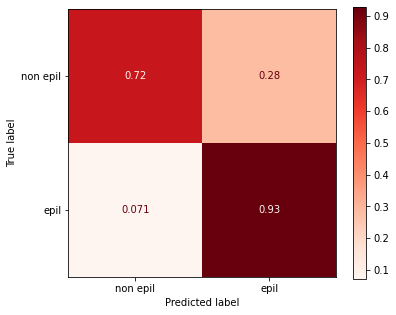

In [ ]:
# tracer la matrice de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print('Accuracy: %.3f' % pipe_reg.score(X_test, Y_test))
fig, ax= plt.subplots(figsize=(6,5))
plot_confusion_matrix(pipe_reg, X_test, Y_test, display_labels=["non epil", "epil"], cmap=plt.cm.Reds, normalize='true', ax=ax)
plt.show()

In [ ]:
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size = 0.2)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size = 0.2)

In [ ]:
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train1, Y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred1 = classifier.predict(X_test1)
Y_pred1


array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train1,
                             y = Y_train1,
                             cv = 10,
                             n_jobs = -1)
accuracies.mean()

0.9134628730048577

In [ ]:
print(' Accuracy: %.3f' % classifier.score(X_test1,Y_test1))

 Accuracy: 0.936


In [ ]:
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test1, Y_pred1)
print(classification_report(Y_test1, Y_pred1, target_names=['Non-seizure', 'Seizure']))

df_cm = pd.DataFrame(cm, range(2), range(2))

              precision    recall  f1-score   support

 Non-seizure       0.76      0.81      0.79        48
     Seizure       0.97      0.96      0.96       282

    accuracy                           0.94       330
   macro avg       0.87      0.88      0.88       330
weighted avg       0.94      0.94      0.94       330



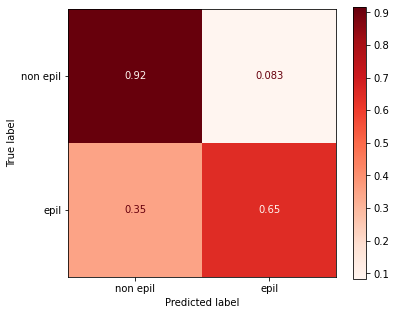

In [ ]:
# tracer la matrice de confusion
fig, ax= plt.subplots(figsize=(6,5))
plot_confusion_matrix(pipe_reg, X_test1, Y_test1, display_labels=["non epil", "epil"], cmap=plt.cm.Reds, normalize='true', ax=ax)
plt.show()

Logistic Regression best parameters :

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2= sc.transform(X_test)

In [ ]:
X_train2, X_test2,Y_train2,Y_test2 = train_test_split(X,Y,test_size = 0.2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size = 0.2)

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train2,Y_train2)
# summarize results
print("Best:")
print(grid_result.best_params_)

Best:
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classifier2=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
classifier2.fit(X_train2,Y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred2 = classifier2.predict(X_test2)
Y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(' Accuracy: %.3f' % classifier2.score(X_test2,Y_test2))

 Accuracy: 0.833


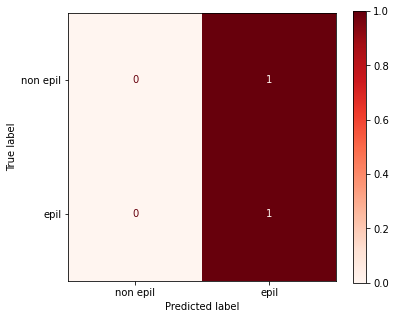

In [ ]:
# tracer la matrice de confusion
from sklearn.metrics import plot_confusion_matrix
fig, ax= plt.subplots(figsize=(6,5))
plot_confusion_matrix(classifier2, X_test2, Y_test2, display_labels=["non epil", "epil"], cmap=plt.cm.Reds, normalize='true', ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_test2, Y_pred2)
print(classification_report(Y_test2, Y_pred2, target_names=['Non-seizure', 'Seizure']))

df_cm = pd.DataFrame(cm, range(2), range(2))

              precision    recall  f1-score   support

 Non-seizure       0.00      0.00      0.00        55
     Seizure       0.83      1.00      0.91       275

    accuracy                           0.83       330
   macro avg       0.42      0.50      0.45       330
weighted avg       0.69      0.83      0.76       330



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
#X1 = df.drop('class',axis=1)
#X = X1.values
#Y = df['class'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print('Feature DataFrame')
display(X.shape)
print('Target DataFrame')
display(Y.shape)

Feature DataFrame


(1648, 401)

Target DataFrame


(1648, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=0)

print('Feature DataFrame')
print('Training size: ' + str(X_train.shape))
print('Test size: ' + str(X_test.shape))
print('\nTarget DataFrame')
print('Training size: ' + str(Y_train.shape))
print('Test size: ' + str(Y_test.shape))

Feature DataFrame
Training size: (1483, 401)
Test size: (165, 401)

Target DataFrame
Training size: (1483, 1)
Test size: (165, 1)


In [ ]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc2 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model2 = abc2.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Model Accuracy, how often is the classifier correct?
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Y_test)
print('AdaBoostClassifier Model accuracy score: {0:0.3f}'.format(accuracy_score(Y_test, y_pred)))

AdaBoostClassifier Model accuracy score: 0.848


> 
Here, Y_test are the true class labels and y_pred are the predicted class labels in the test-set.


In [ ]:
#Compare train and test set accuracy
y_pred_train = model2.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(Y_train, y_pred_train)))

Training-set accuracy score: 0.823


In [ ]:
#Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model2.score(X_test, Y_test)))

Training set score: 0.8227
Test set score: 0.8485




> The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.



 Confusion-matrix :



In [ ]:
#view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  0  25]
 [  0 140]]

True Positives(TP) =  0

True Negatives(TN) =  140

False Positives(FP) =  25

False Negatives(FN) =  0


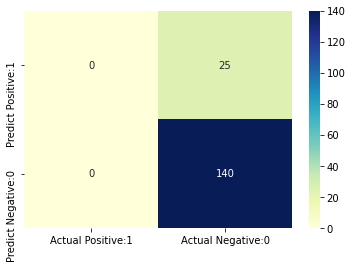

In [ ]:
import seaborn as sns # statistical data visualization
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Metrices :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.85      1.00      0.92       140

    accuracy                           0.85       165
   macro avg       0.42      0.50      0.46       165
weighted avg       0.72      0.85      0.78       165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameter Tuning :

With the use of GridSearchCV, we will generate different models of AdaBoostClassifier using the different combinations taken by the parameters 'n_estimators' and 'learning_rate'. The use of 3-fold cross validation:3/5 of the train data will be used to train the model while changing the hyperparameters 'and 2/5 of the train data remained will be used to test each model according to the hyperparameters fixed.



*   'n_estimators':The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

*   'base_estimator': It is a weak learner used to train the model.
*   'learning_rate':Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.



In [ ]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {    'n_estimators': [100,200,300],'learning_rate':[0.1,0.2,0.3,1]}
#Building a 3 fold CV GridSearchCV
grid= GridSearchCV(estimator = abc2, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
 #Fitting the grid to the training 
grid.fit(X_train,Y_train)
#Extracting the best parameters

Determine the best values of the parameters that we will fix and use for our model :

In [ ]:
grid.best_params_

Training our model AdaBoostClassifier by fixing the best parameters :

In [ ]:
# Create adaboost classifer object
abc1 = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1)
# Train Adaboost Classifer
model = abc1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calculate the score of our final model :

In [ ]:
#Predict the response for test dataset
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, y_pred)
print('AdaBoostClassifier Model accuracy score: {0:0.3f}'.format(accuracy_score(Y_test, y_pred)))

AdaBoostClassifier Model accuracy score: 0.848


In [ ]:
#Check for Overfitting
# print the scores on training and test set

print('Training set score: {:.3f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.3f}'.format(model.score(X_test, Y_test)))

Training set score: 0.976
Test set score: 0.964


==> As we can see,after changing the values of the parametrs ,we obtained a test_score=0.840 which is better than the previous score(=0.960)

Confusion-matrix :

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  0  25]
 [  0 140]]

True Positives(TP) =  0

True Negatives(TN) =  140

False Positives(FP) =  25

False Negatives(FN) =  0


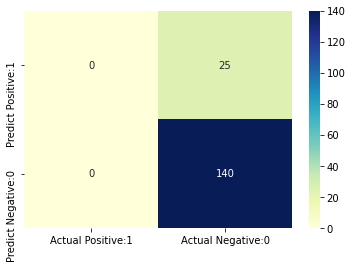

In [ ]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns # statistical data visualization
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
###Classification Metrices
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.85      1.00      0.92       140

    accuracy                           0.85       165
   macro avg       0.42      0.50      0.46       165
weighted avg       0.72      0.85      0.78       165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(Y_test1, Y_pred1)
print(classification_report(Y_test1, Y_pred1, target_names=['Non-seizure', 'Seizure']))

df_cm = pd.DataFrame(cm, range(2), range(2))